In [ ]:
import mne
import pandas as pd

import matplotlib.pyplot as plt
from mne.datasets.sleep_physionet.age import fetch_data

Extracting EDF parameters from /content/SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8792999  =      0.000 ... 87929.990 secs...


/tmp/ipython-input-64790760.py:3: RuntimeWarning: Number of records from the header does not match the file size (perhaps the recording was not stopped before exiting). Inferring from the file size.
  raw = mne.io.read_raw_edf(local_path, preload=True)
/tmp/ipython-input-64790760.py:3: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw = mne.io.read_raw_edf(local_path, preload=True)
/tmp/ipython-input-64790760.py:3: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw = mne.io.read_raw_edf(local_path, preload=True)
/tmp/ipython-input-64790760.py:3: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  raw = mne.io.read_raw_edf(local_path, preload=True)



📋 Información del archivo:
<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fpz-Cz, EEG Pz-Oz, EOG horizontal, Resp oro-nasal, EMG ...
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: 1989-04-24 16:13:00 UTC
 nchan: 7
 projs: []
 sfreq: 100.0 Hz
 subject_info: <subject_info | his_id: X, sex: 2, first_name: Female, last_name: 33yr>
>
Using matplotlib as 2D backend.


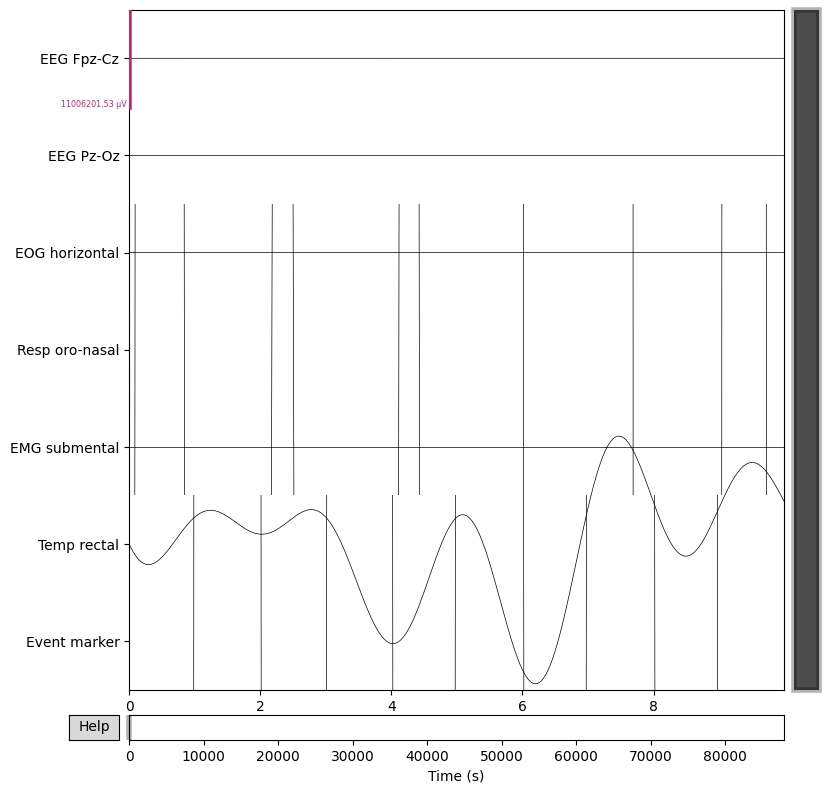

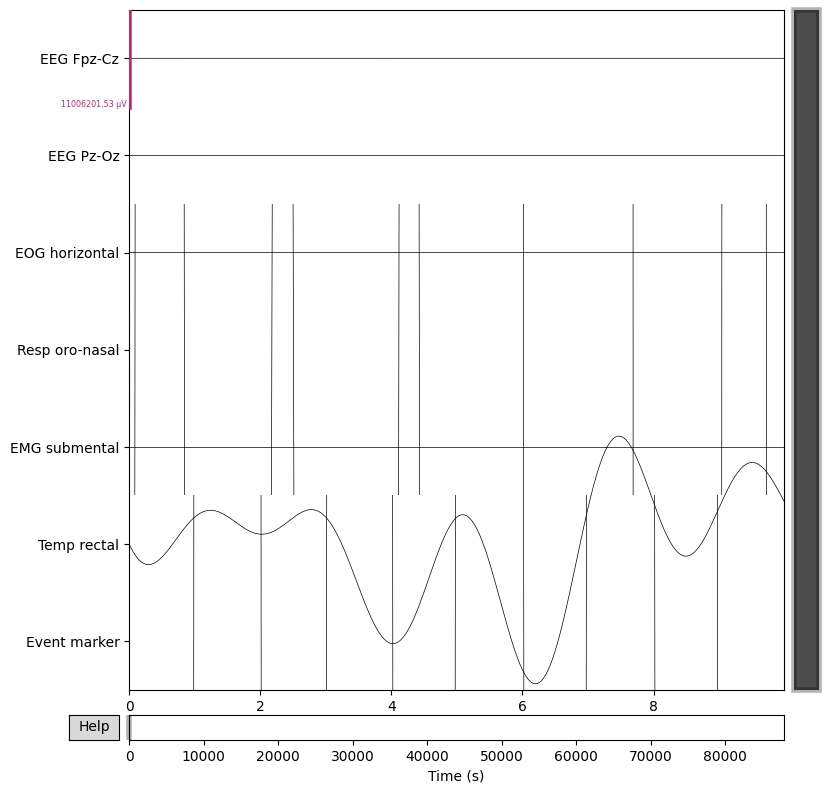

In [ ]:
local_path = "/edf/S001R02.edf"

raw = mne.io.read_raw_edf(local_path, preload=True)

raw.plot(duration=10, scalings='auto')
